# CREDIT  RISK MODELLING 

# 1. Setting the Background


The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We can then use these results to develop a credit rating. 

We will eplore the following concepts in the notebook
1. Data cleaning - Struucturing the data for modelling 
2. What to do with missing values 
3. How to deal with class imbalance and the implications. 


# 2. Importing Libraries 

In [16]:
# %matplotlib inline
# !pip install imbalanced-learn
# !pip install category_encoders
# General Libraries 
import warnings
warnings.filterwarnings('ignore')
import itertools
import random

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization

# Data modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder,  RobustScaler
import category_encoders as ce

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR,SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix


# 3. Loading the Data and getting to know it.

In [6]:
#Loading data 
Loan = pd.read_csv("raw_data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [7]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [8]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [9]:
Loan_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [10]:
Loan_renamed.shape

(119528, 32)

# 4. Exploratory Data Analysis (EDA) 

### 4.1 Missingness in the Data

Text(0.5, 1.0, 'MISSINGNESS IN THE DATA')

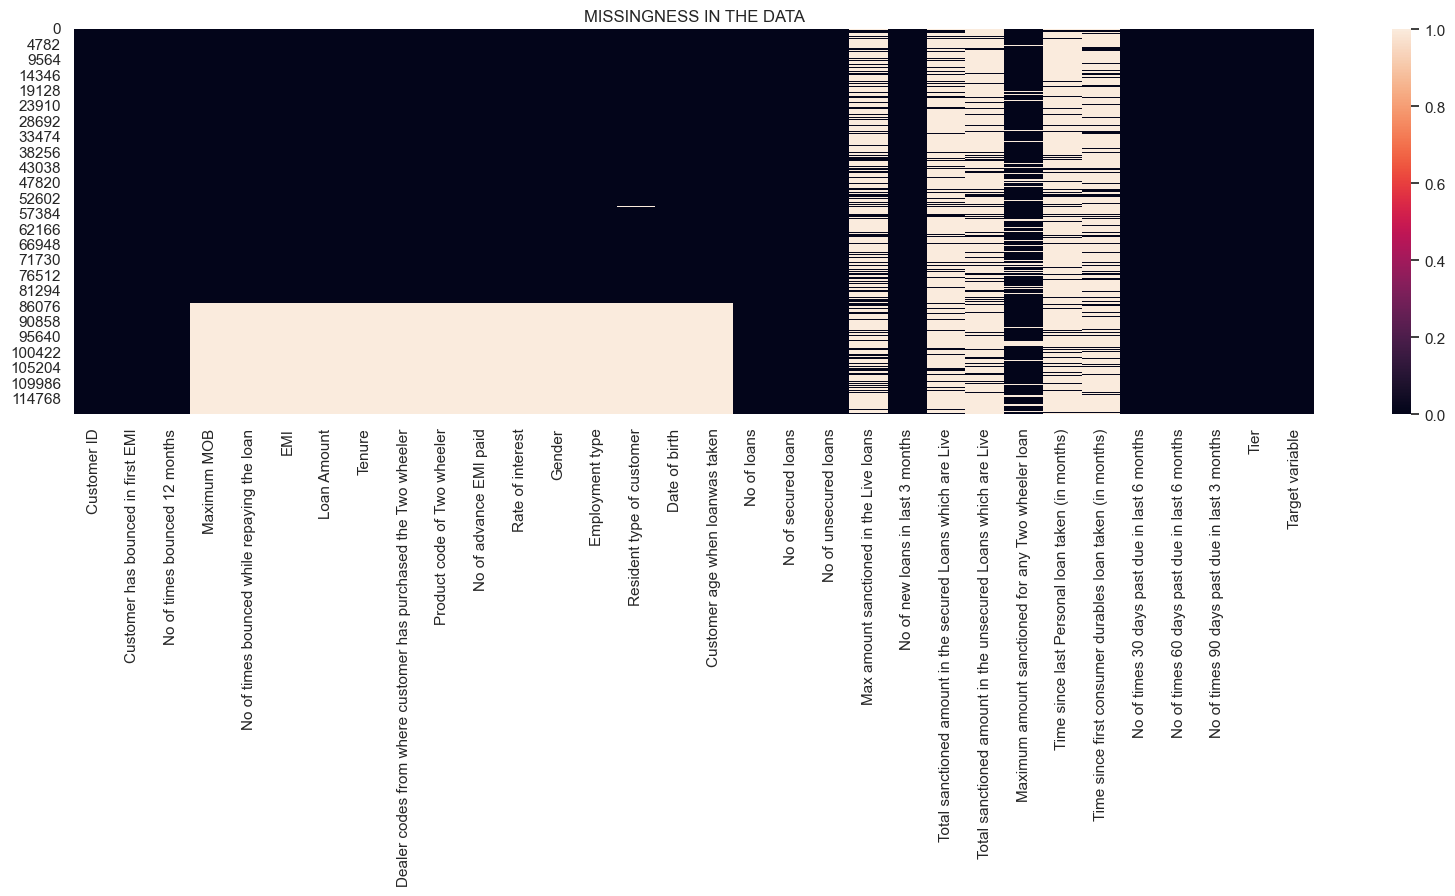

In [20]:
# Missingness in the data
plt.figure(figsize=(20,5))
sns.heatmap(Loan_renamed.isnull())
plt.title('MISSINGNESS IN THE DATA')

As illustrated in the two figures above there are quite a number of features with missing values.

In [21]:
# get the number of missing data points per column
missing_values_count = Loan_renamed.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(Loan_renamed.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

25.818715070945718

- We are missing almost 26% of the data

### 4.2 Visualising how Loan amount is distributed

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

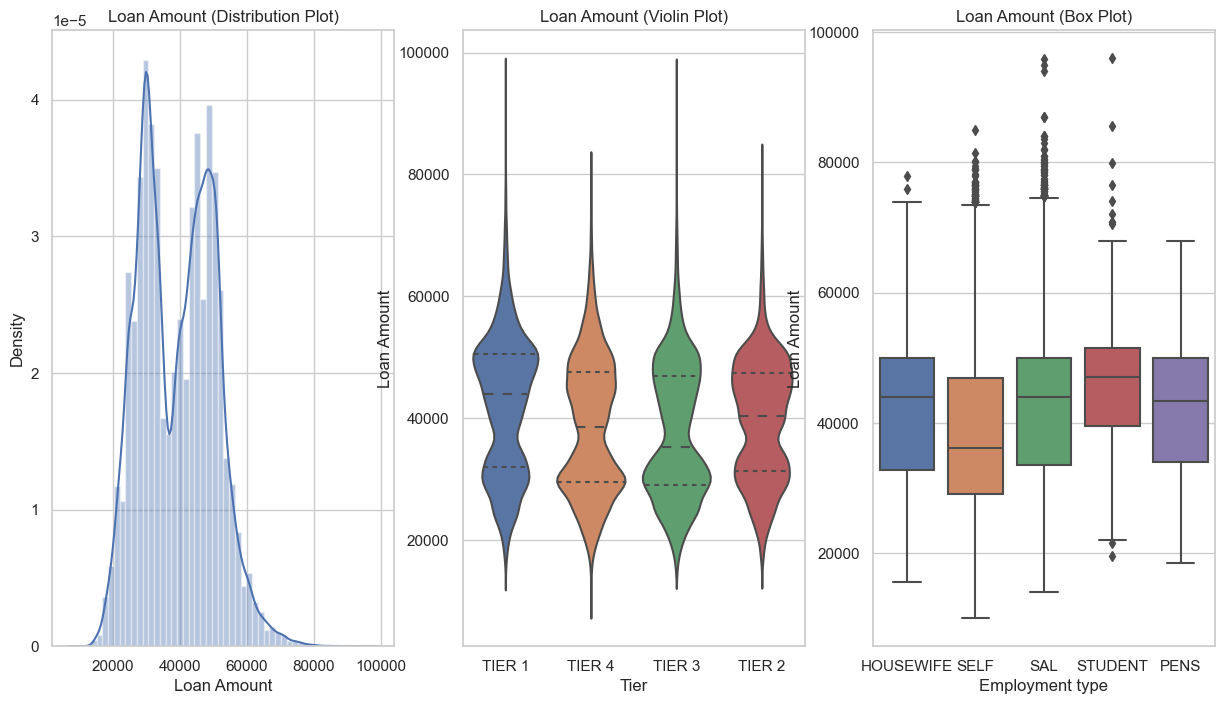

In [22]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(15,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(Loan_renamed['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =Loan_renamed, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =Loan_renamed, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

- For the first plot we can see that the loans that are usually taken are in the range of 20,000 to 60,000 mostly
- the plot shows we have some outliers in most of the employment types.

Plots of Age of customer when loan was taken

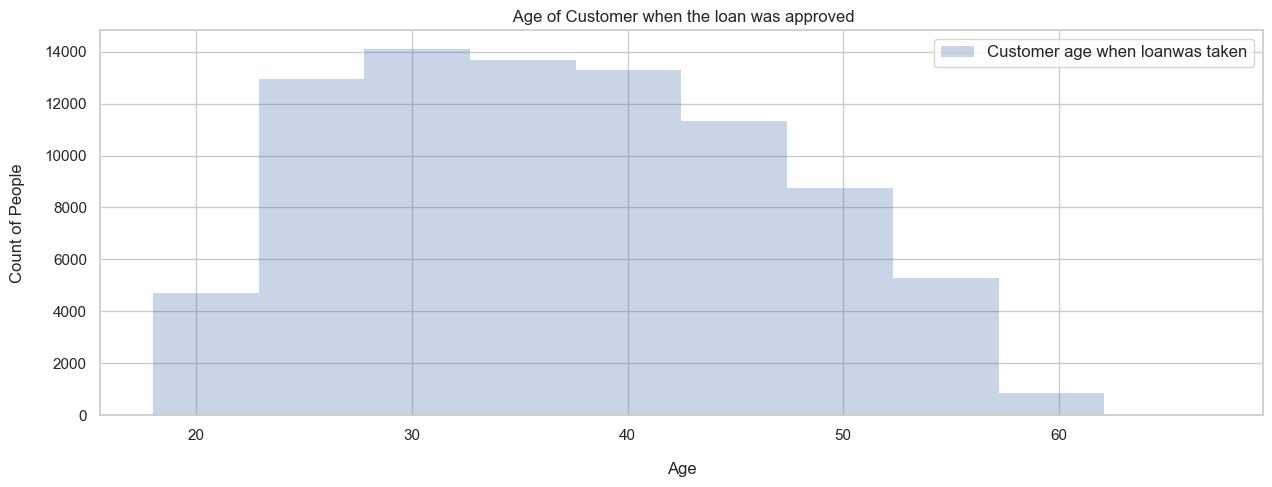

In [23]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

- mostly individuals between the age of 25 to 50 years are the ones who take the loans


<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

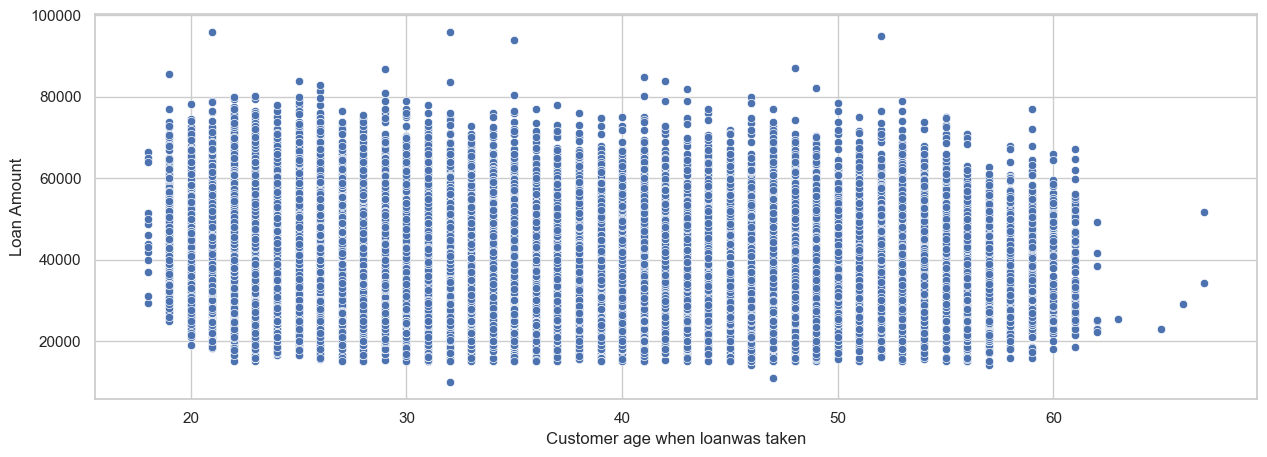

In [24]:
# Explore correlation between age and loan amount 
plt.figure(figsize=(15,5))
sns.scatterplot(x=Loan_renamed['Customer age when loanwas taken'],y='Loan Amount',data=Loan_renamed)

## 4.3 Data Cleaning

### 4.3.1 Dropping Columns and rows we might not need

In [25]:
Loan_renamed.dropna(axis=0, how= "any", subset= "Loan Amount", inplace= True)

In [26]:
#Dropping coloumns with more than 50% missingness, And customer ID 
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live',
'Customer ID',"Date of birth"]

Loan_renamed.drop(dropped,axis=1,inplace=True)

### 4.3.2 Separating our Categorical and Numerical Data Sets

In [27]:
data = Loan_renamed.copy()
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(include=['float','int'])

### 4.3.3 Impute the categorical and Numerical data with mode and Median

#### Categorical Columns

In [28]:
#categorical.columns[categorical.isnull().any()].tolist()

In [29]:
# Calculate mode for each feature in categorical.
mode_values = categorical.mode().iloc[0]
# Impute missing values with mode
categorical = categorical.fillna(mode_values)

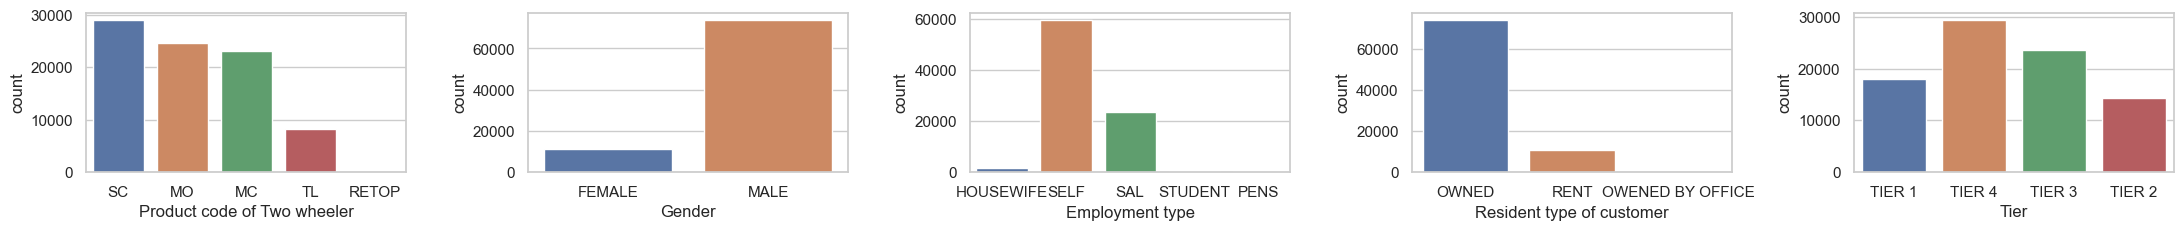

In [30]:
fig = plt.figure(figsize=(22,20))
for i in range(len(categorical.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.countplot(x=categorical.iloc[:, i])
plt.tight_layout()
plt.show()

#### Numerical  Columns

In [ ]:
#numerical.columns[numerical.isnull().any()].tolist()

In [31]:
median_value = numerical.median()
numerical = numerical.fillna(median_value)

#### Checking for outliers on the Numerical Columns

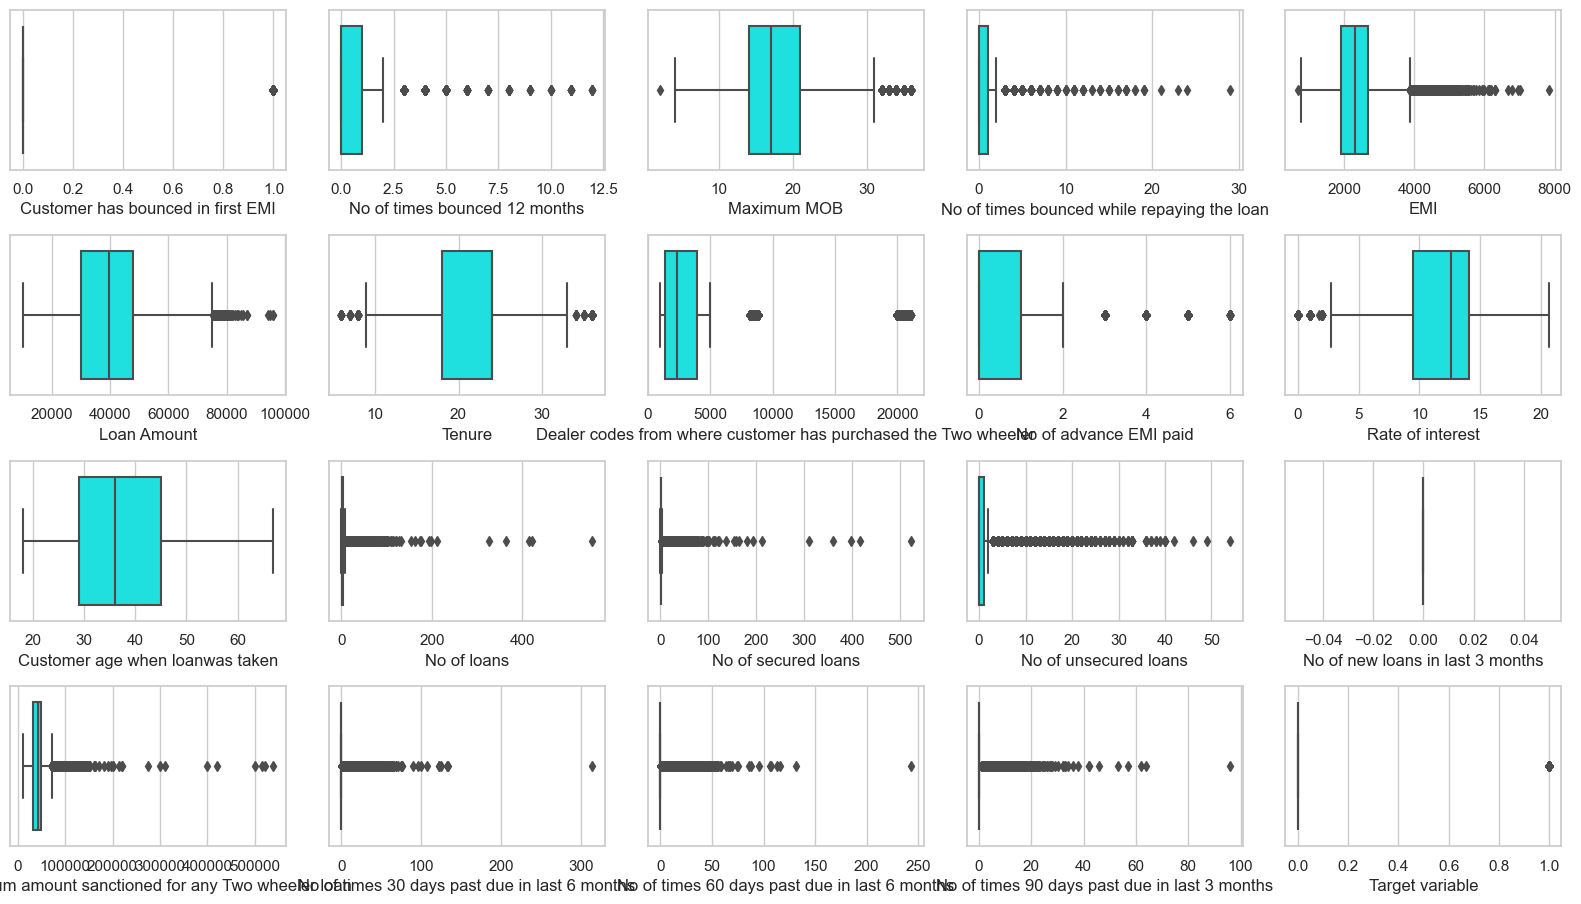

In [32]:
fig=plt.figure(figsize=(16,20))
for var in range(len(numerical.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=numerical.iloc[:,var],color="cyan")
plt.tight_layout()
plt.show()

- since there are outliers, this helps us in determinig which scaller we shall use. ie for this case we shall use the roburst scaler. 

## 4.4 Univariet Data Analysis (KDE) For Numerical columns

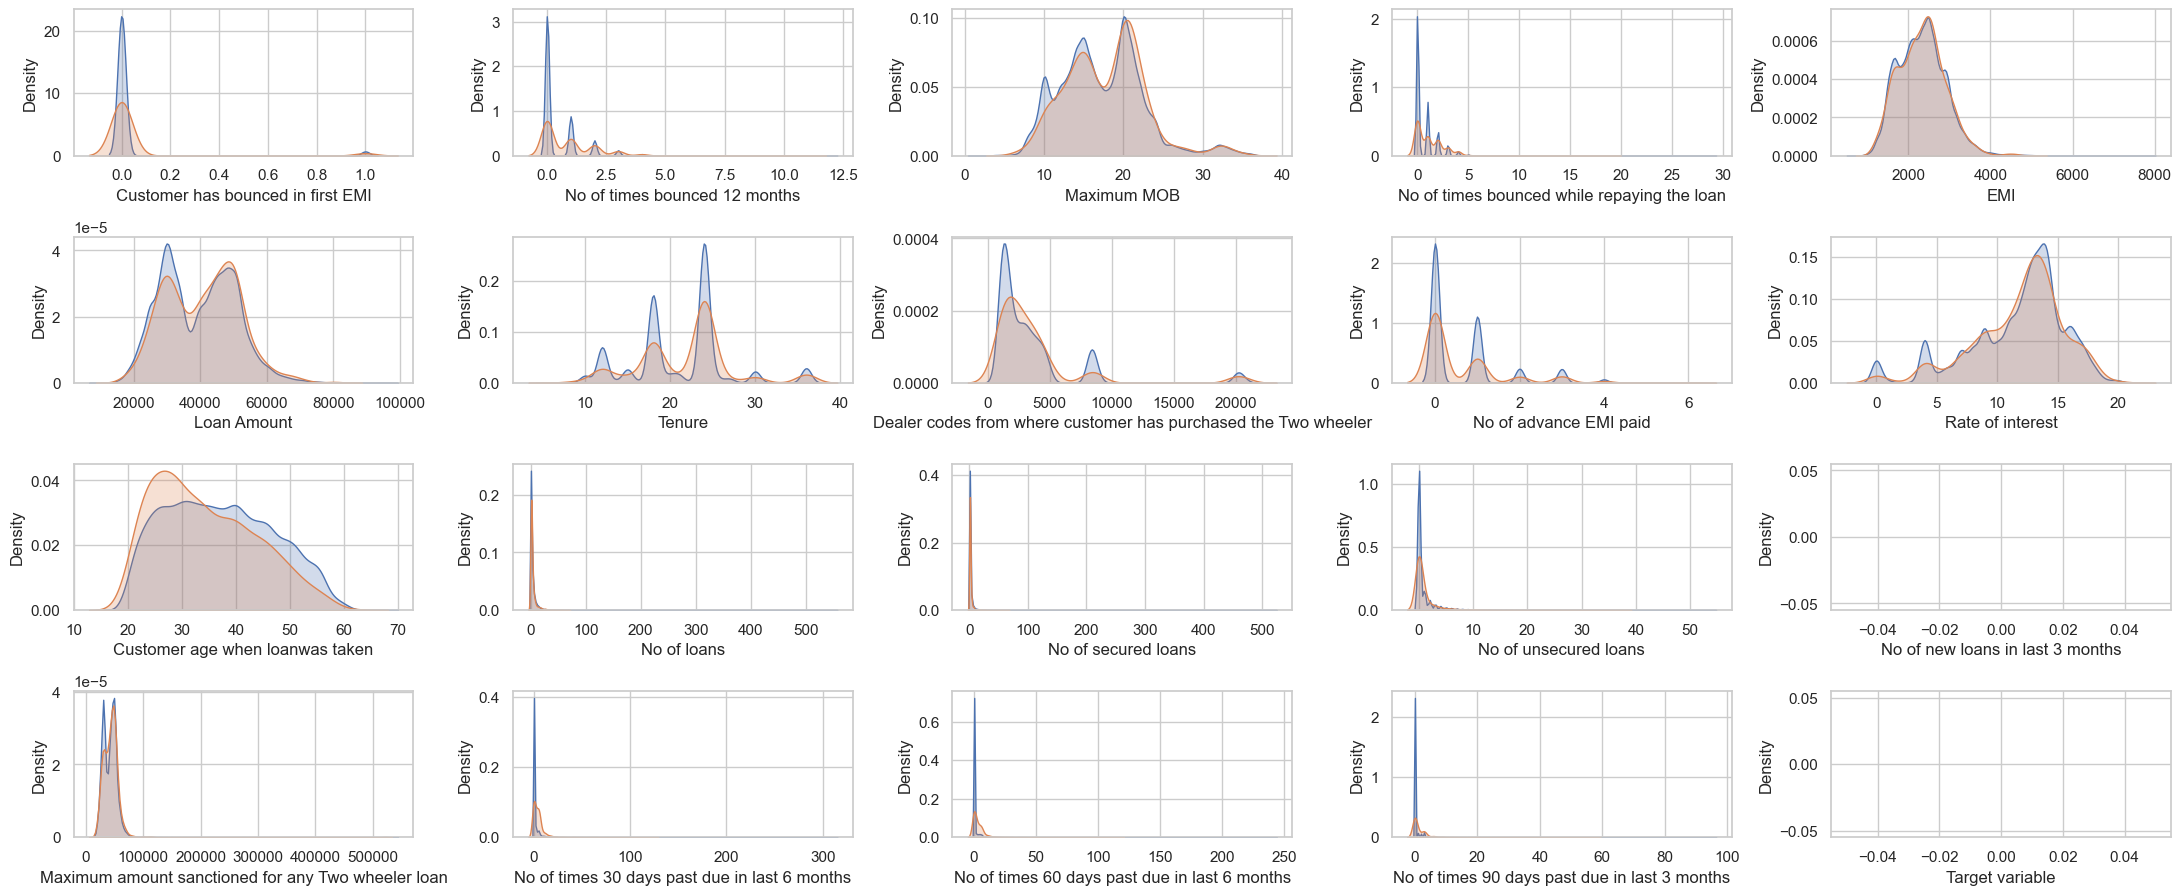

In [33]:
fig = plt.figure(figsize=(22,20))
for i in range(len(numerical.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.kdeplot(data[numerical.columns[i]][numerical["Target variable"]== 0] , shade = True)
    sns.kdeplot(data[numerical.columns[i]][numerical["Target variable"]== 1] ,shade = True)
plt.tight_layout()
plt.show()

## 4.5 Bivarient Data Analysis (Scater plot)

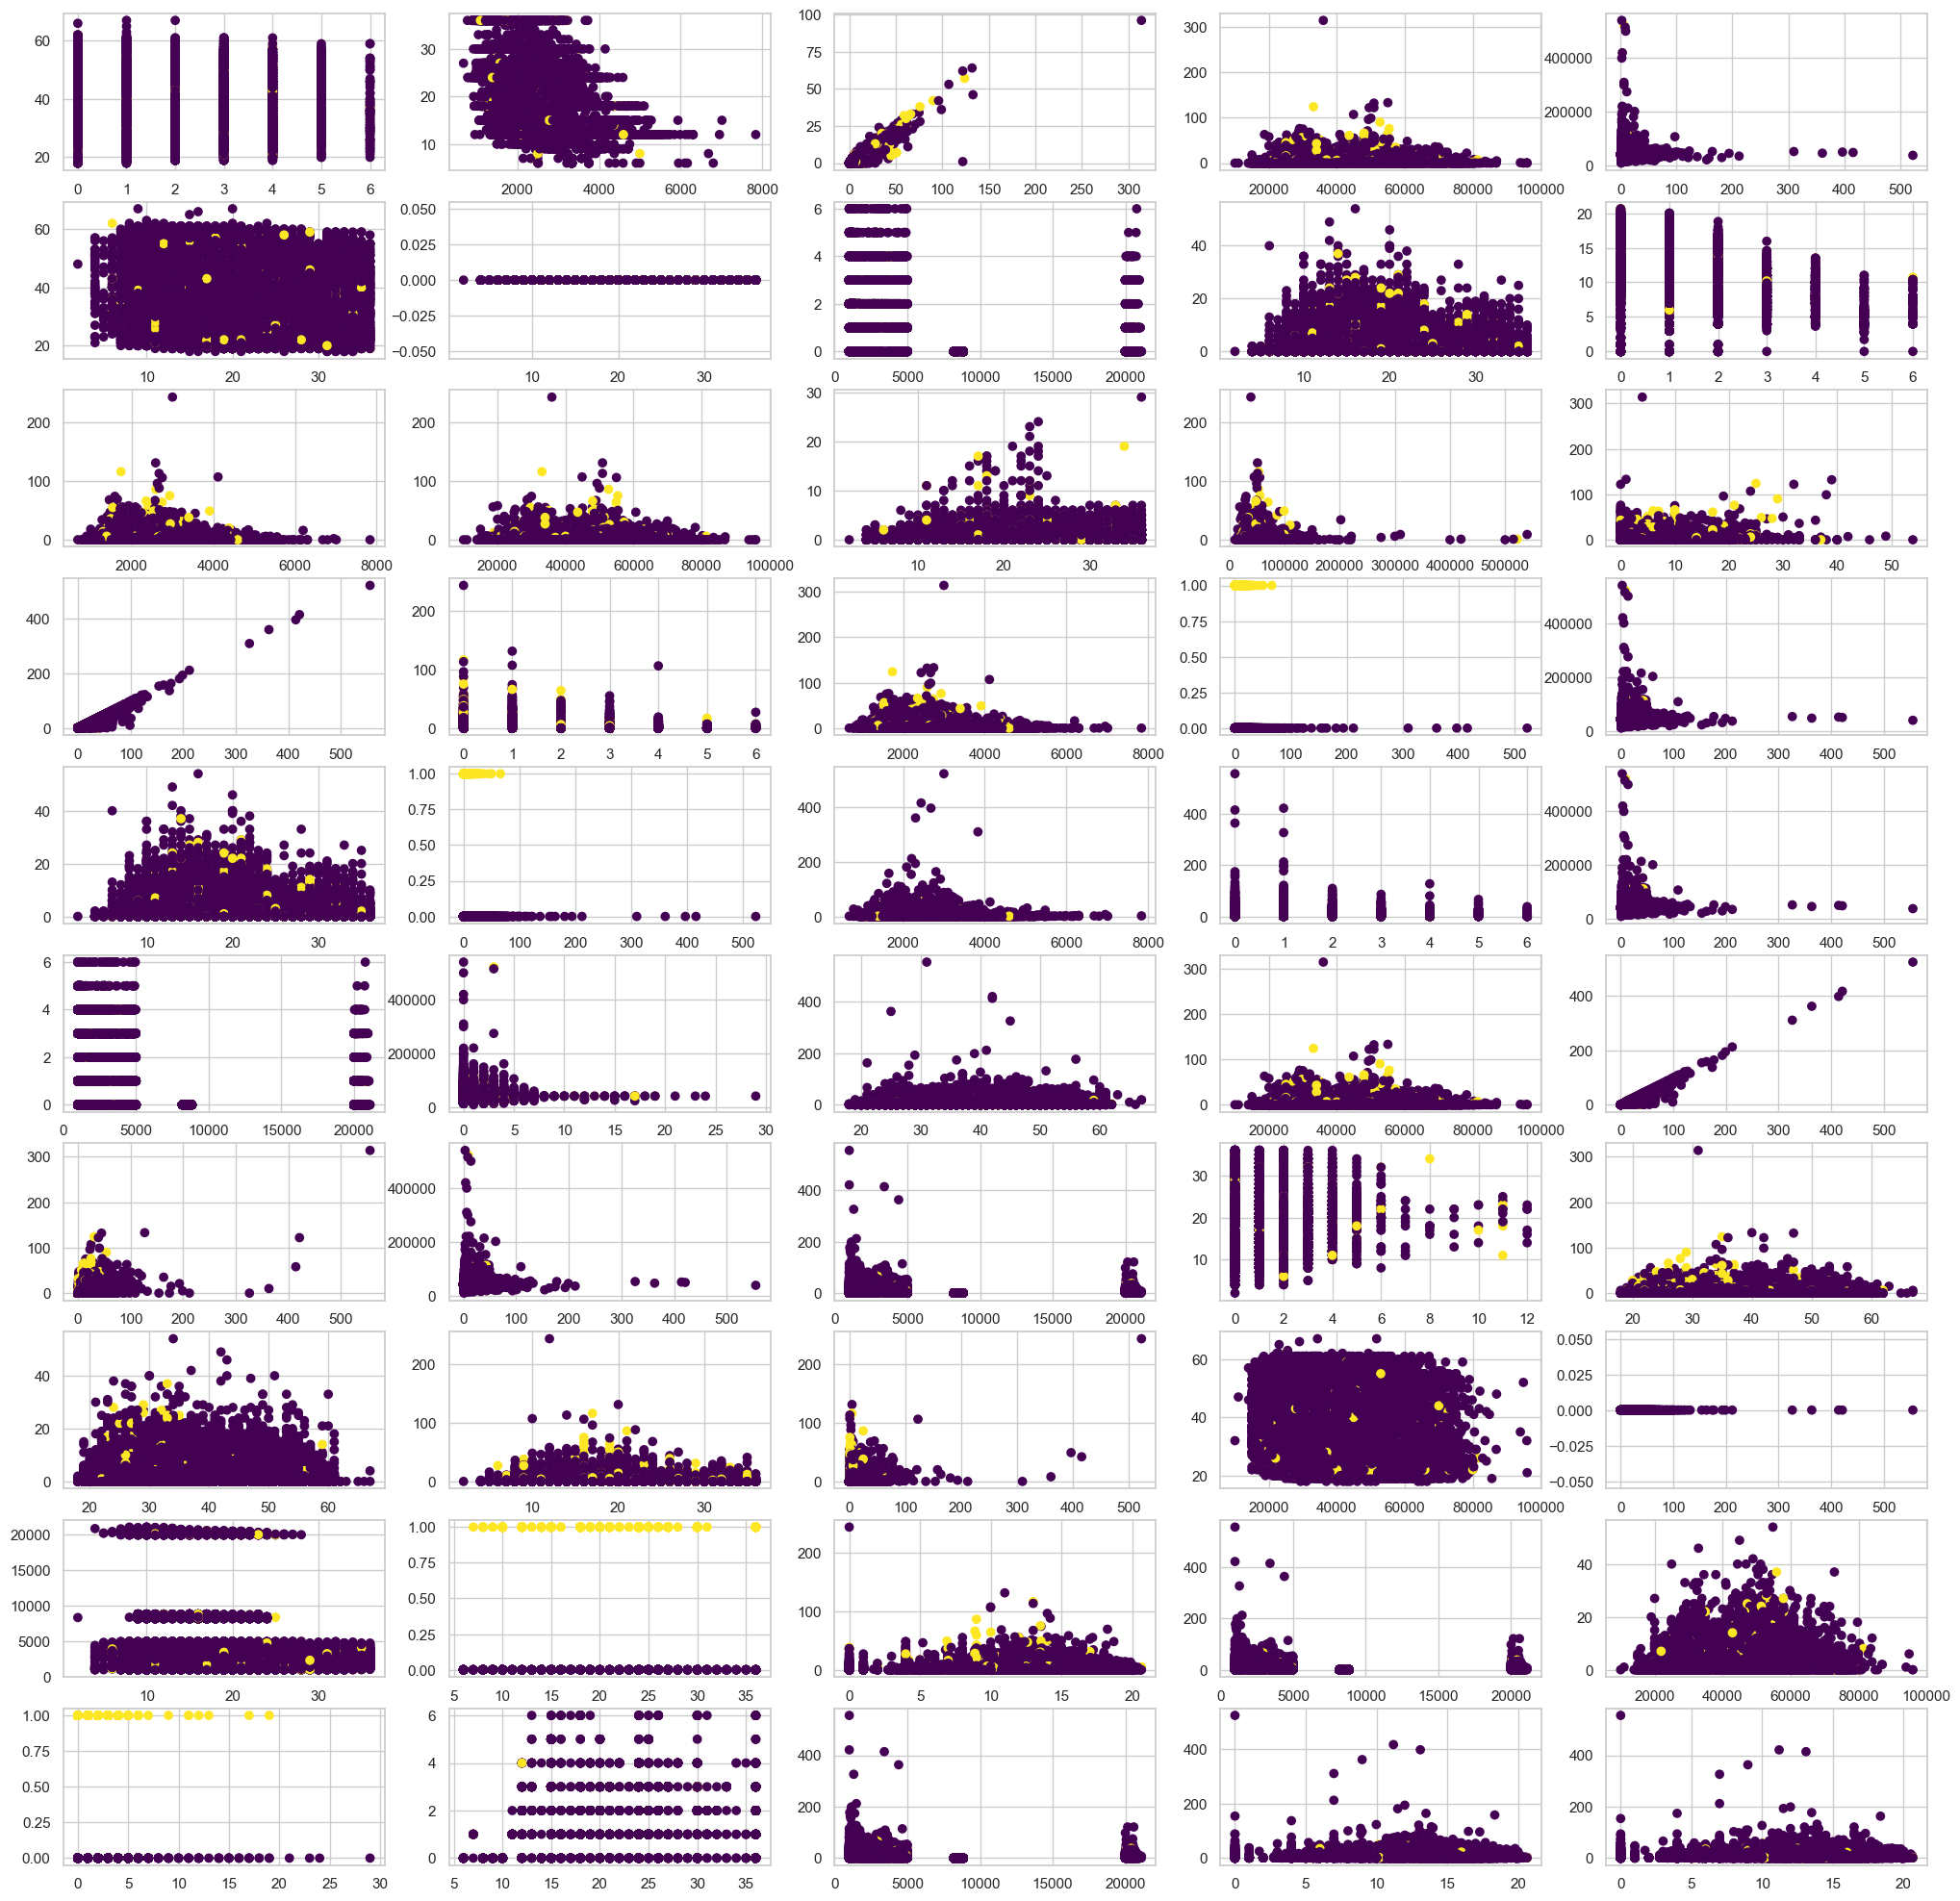

In [34]:
comb = list(itertools.combinations([a for a in range(1, len(numerical.columns))], 2))
rand = random.choices(comb, k=50)
fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(numerical[numerical.columns[rand[i][0]]],numerical[numerical.columns[rand[i][1]]],
                c=numerical["Target variable"],cmap='viridis')

## 4.6 Imbalance in our Output Variable

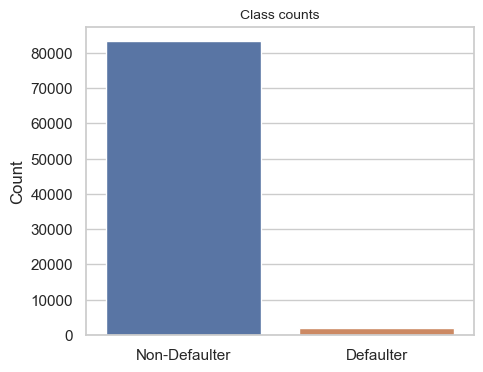

Target variable
Non-Defaulter    83194
Defaulter         1854
Name: count, dtype: int64


In [34]:
# Filter the DataFrame to include only the rows with the desired categories
Loan_filtered = Loan_renamed[Loan_renamed['Target variable'].isin([0, 1])]

# Map the column values to 'Non-Defaulter' and 'Defaulter'
Loan_filtered['Target variable'] = Loan_filtered['Target variable'].map({0: 'Non-Defaulter', 1: 'Defaulter'})

# Plot the count plot
plt.figure(figsize=(5, 4))
sns.countplot(x = Loan_filtered['Target variable'])
# Customize the plot
plt.xticks([0, 1], ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", fontdict={"fontsize": 10})

plt.show()

# Print value counts to verify
print(Loan_filtered['Target variable'].value_counts())

- The data set is imbalanced as defualters are significanltly less than 5% of the total data.

## 4.7 Correlation

## 4.8 Data Trasformation


### 4.8.1 LabelEncoder for categorical data

In [40]:
le = LabelEncoder()
for col in categorical:
    categorical[col] = le.fit_transform(categorical[col])

In [41]:
categorical.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier
0,3,0,0,1,0
1,1,1,3,2,0
2,3,1,3,2,0
3,3,0,2,2,0
4,0,1,2,2,0


### 4.8.2 Scaling of the Numerical Columns

In [42]:
#separating my target from the other numerical values so that I can scale my data
df_numerical = numerical.drop(columns=['Target variable'])
df_target = numerical['Target variable']

In [43]:
RobustScaler
# Initialize the scaler
scaler = RobustScaler()
# Fit and transform the numerical DataFrame
numerical_scaled= pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

In [44]:
numerical_scaled.head(1)

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months
0,0.0,0.0,1.0,0.0,0.141058,0.377778,0.0,-0.362564,0.0,0.03268,0.25,0.0,0.0,0.0,0.0,0.261025,0.0,0.0,0.0


# 5. Model Data Preparation

## 5.1 Joining the Data set

In [46]:
df1 = pd.concat([categorical,numerical_scaled,df_target],axis=1) #joining our data set
df1.head(1)

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,3,0,0,1,0,0.0,0.0,1.0,0.0,0.141058,...,0.25,0.0,0.0,0.0,0.0,0.261025,0.0,0.0,0.0,0


## 5.2 Selecting Feature and Target Matrices

In [52]:
X = df1.drop('Target variable',axis=1)
y = df1['Target variable']

print(X.shape)
print(y.shape)

(85048, 24)
(85048,)


## 5.3 Solving the problem of Imbalance

<Axes: >

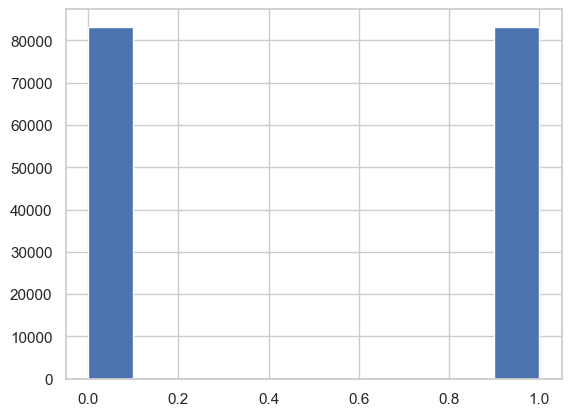

In [51]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

We can see that the Target variable is now balanced hence we have solved the problem in imbalance.

In [53]:
print(x_res.shape)
print(y_res.shape)

(166388, 24)
(166388,)


In [46]:
# # separate training and test sets 
# X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=20)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## 5.4 Separate training and test sets 

In [54]:
X_train, X_test, y_train, y_test= train_test_split(x_res,y_res,test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(116471, 24) (49917, 24) (116471,) (49917,)


# 7. Model Selection

## 7.1 Random Forest Regressor model

In [48]:
# Fitting a Random Forest Regressor model
model_reg = RandomForestRegressor(n_estimators=100, random_state=20)
model_reg.fit(X_train, y_train)

# Predicting the target values for the test set
y_hat = model_reg.predict(X_test)

# Calculating the R-squared score
r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)


print("R-squared score:", r2)
print("mean_squared_error:", mse)

R-squared score: 0.9466260714336311
mean_squared_error: 0.013343456645688685


## 7.2 KNeighbors Classifier

In [49]:
# Initializing the K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors= 5)

# Initialize and train the KNN model again
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9274796161628303
F1 Score: 0.9321411164848349


## 7.3 Gradient Boost

In [50]:
# Initializing the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=20)

# Training the model
model_gb.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9256565899392992
F1 Score: 0.9240063072102881


## 7.4 Logistic Regration model

In [51]:
# Initializing the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Training the model
model_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.767153474768115
F1 Score: 0.7584630410839343


## 7.5 Support Vector Classifier

In [52]:
# Initializing the Support Vector Classifier model
model_svc = SVC(kernel='poly', random_state=20)

# Training the model
model_svc.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_svc.predict(X_test)

# Evaluating the model
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_svc)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7900314522106697
F1 Score: 0.7697141476061784


Conclusion

- KNeighbors Classifier and the Gradient Boost are the better models in predicting the outcome as the have a better F1 score